# Seminar 8 - Binary Dependent Variable - Answers

In April 2008, the unemployment rate in the United States stood at 5.0%. By April 2009, it had increased to 9.0%, and it had increased further, to 10.0%,
by October 2009. Were some groups of workers more likely to lose their jobs than others during the Great Recession? 

The <b>employment_08_09.xlsx</b> contains a random sample of 5440 workers who were surveyed in April 2008 and reported that they were employed full-time. 

You can download the data from [here](https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/employment_08_09.xlsx).

A detailed description is given [here](https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/employment_08_09_description.pdf). 

These workers were surveyed one year later, in
April 2009, and asked about their employment status (employed, unemployed, or out of the labor force). 

Use these data to answer the following questions.

In [70]:
# Importing useful libraries and loading data set

import numpy as np
import pandas as pd
import pandas.plotting as pp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as si
import statsmodels.discrete.discrete_model as dm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from statsmodels.compat import lzip

In [ ]:
from google.colab import files
files.upload()

In [49]:
df = pd.read_excel("employment_08_09.xlsx")

In [50]:
df

,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,ce_states,...,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,53,1,NaN,1,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,39,1,NaN,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
2,41,1,500.00,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,27,1,520.00,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
4,29,3,615.00,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,24,1,300.00,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5408,50,2,562.50,1,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1
5409,44,1,1038.46,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
5410,49,2,640.00,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1


<b>
1. Are there any missing data in the data set?
</b>

In [51]:
df.describe()

,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,ce_states,...,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
count,5412.000000,5412.000000,4773.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,...,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000
mean,42.602365,1.227827,848.419432,0.875462,0.044161,0.650591,0.126940,0.210458,0.292129,0.249815,...,0.176275,0.705654,0.118071,0.067997,0.275868,0.196970,0.109756,0.220806,0.128603,0.488359
std,11.563492,0.564798,586.292696,0.330225,0.205472,0.476827,0.332937,0.407672,0.454783,0.432946,...,0.381089,0.455790,0.322722,0.251764,0.446992,0.397746,0.312614,0.414828,0.334791,0.499911
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,440.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,1.000000,700.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,1.000000,1100.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,63.000000,3.000000,2884.610000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
df = df.dropna()

In [53]:
df.describe()

,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,ce_states,...,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
count,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,...,4773.000000,4773.000000,4773.0,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000
mean,42.054054,1.236120,848.419432,0.875131,0.048188,0.633983,0.143935,0.211397,0.293526,0.250995,...,0.199874,0.800126,0.0,0.068720,0.278022,0.199665,0.110832,0.219987,0.122774,0.511209
std,11.647394,0.571555,586.292696,0.330605,0.214185,0.481765,0.351060,0.408342,0.455425,0.433631,...,0.399948,0.399948,0.0,0.253004,0.448071,0.399790,0.313957,0.414281,0.328212,0.499927
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,440.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,1.000000,700.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,52.000000,1.000000,1100.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,63.000000,3.000000,2884.610000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b>
2. What fraction of workers in the sample were employed in April 2009? Use your answer to compute a 95% confidence interval for the probability that a worker was employed in April 2009, conditional on being
employed in April 2008.
</b>

In [7]:
# Proportion of employed individuals in 2009 coditional on being employed in 2008

sample_size = df.employed.count()

prop = sum(df.employed == 1)/sample_size

print("The fraction of workers in the sample were employed in April 2009 was:", prop)

# Confidence interval for the proportion

lower_limit = prop - 1.96*np.sqrt(prop*(1-prop)/sample_size)
upper_limit = prop + 1.96*np.sqrt(prop*(1-prop)/sample_size)

print("The 95% confidence interval for the fraction of workers in the sample were employed in April 2009 was:", lower_limit, upper_limit)

The fraction of workers in the sample were employed in April 2009 was: 0.8751309448983867
The 95% confidence interval for the fraction of workers in the sample were employed in April 2009 was: 0.865752641310455 0.8845092484863184


<b>
3.Regress $Employed$ on $Age$ and $Age^2$, using the probit and logistic regression models. Write both estimated models.
</b>

In [54]:
df['age_2'] = df['age']**2

formula = 'employed ~ age + age_2'

probit_model = smf.probit(formula, df).fit(cov_type='HC1')
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.367826
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:               employed   No. Observations:                 4773
Model:                         Probit   Df Residuals:                     4770
Method:                           MLE   Df Model:                            2
Date:                Tue, 23 Apr 2024   Pseudo R-squ.:                 0.02308
Time:                        20:26:25   Log-Likelihood:                -1755.6
converged:                       True   LL-Null:                       -1797.1
Covariance Type:                  HC1   LLR p-value:                 9.739e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1950      0.261     -4.578      0.000      -1.707      -0.683
age            0.1181      0.

C:\Users\ecacicedo\AppData\Local\Temp\ipykernel_13828\1916251470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_2'] = df['age']**2


The Probit model equation is

$$ P(Employed=1|Age,Age^2) = N(-1.20+0.12 \times Age - 0.0014 \times Age^2) $$



In [9]:
logistic_model = smf.logit(formula, df).fit(cov_type='HC1')
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.367743
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               employed   No. Observations:                 4773
Model:                          Logit   Df Residuals:                     4770
Method:                           MLE   Df Model:                            2
Date:                Tue, 23 Apr 2024   Pseudo R-squ.:                 0.02330
Time:                        17:03:52   Log-Likelihood:                -1755.2
converged:                       True   LL-Null:                       -1797.1
Covariance Type:                  HC1   LLR p-value:                 6.554e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3733      0.467     -5.081      0.000      -3.289      -1.458
age            0.2187      0.

The Logistic Regression model equation is

$$ P(Employed=1|Age,Age^2) = \frac{1}{1+e^{-(-2.37+0.22 \times Age - 0.0025 \times Age^2)}} $$

<b>
4. Based on the result of the regressions, was age a statistically significant determinant of employment in April 2009?
</b>

Yes, the coefficient of $Age$ is statistically significant in both models.

<b>
5. Is there evidence of a nonlinear effect of age on the probability of being employed?
</b>

Yes, the coefficient of $Age^2$ is statistically significant in both models.

<b>
6. Compute the predicted probability of employment for a 20-year-old worker, a 40-year-old worker, and a 60-year-old worker. For the probit model use the function $norm.cdf$ from $scipy.stats$. For the logistic regression use the function $logistic.cdf$ from $scipy.stats$.
</b>

In [31]:
# Probit model

z_20 = probit_model.params['Intercept'] + probit_model.params['age']*20 + probit_model.params['age_2']*(20**2)
z_40 = probit_model.params['Intercept'] + probit_model.params['age']*40 + probit_model.params['age_2']*(40**2)
z_60 = probit_model.params['Intercept'] + probit_model.params['age']*60 + probit_model.params['age_2']*(60**2)

probit_pred_20 = si.norm.cdf(z_20,0.0,1.0)
probit_pred_40 = si.norm.cdf(z_40,0.0,1.0)
probit_pred_60 = si.norm.cdf(z_60,0.0,1.0)

print("The predicted probability of employment for a 20-year-old worker is:",probit_pred_20)
print("The predicted probability of employment for a 40-year-old worker is:",probit_pred_40)
print("The predicted probability of employment for a 60-year-old worker is:",probit_pred_60)

The predicted probability of employment for a 20-year-old worker is: 0.7327348923730326
The predicted probability of employment for a 40-year-old worker is: 0.9108339699071875
The predicted probability of employment for a 60-year-old worker is: 0.8363120604767812


In [32]:
# Logistic Regression model

line_20 = logistic_model.params['Intercept'] + logistic_model.params['age']*20 + logistic_model.params['age_2']*(20**2)
line_40 = logistic_model.params['Intercept'] + logistic_model.params['age']*40 + logistic_model.params['age_2']*(40**2)
line_60 = logistic_model.params['Intercept'] + logistic_model.params['age']*60 + logistic_model.params['age_2']*(60**2)

logistic_pred_20 = si.logistic.cdf(line_20)
logistic_pred_40 = si.logistic.cdf(line_40)
logistic_pred_60 = si.logistic.cdf(line_60)

print("The predicted probability of employment for a 20-year-old worker is:",logistic_pred_20)
print("The predicted probability of employment for a 40-year-old worker is:",logistic_pred_40)
print("The predicted probability of employment for a 60-year-old worker is:",logistic_pred_60)

The predicted probability of employment for a 20-year-old worker is: 0.7285524063635228
The predicted probability of employment for a 40-year-old worker is: 0.9105889535150494
The predicted probability of employment for a 60-year-old worker is: 0.835808847390029


<b>
7. Investigate whether the conclusions on the effect of age on employment from your models are affected by omitted variable bias.
</b>

In [33]:
df.corr()

,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,ce_states,...,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,age_2
age,1.000000,-0.034813,0.211267,0.051167,-0.024144,0.243732,0.104286,0.027205,-0.013619,0.017893,...,-0.118645,NaN,-0.051395,0.013663,-0.073423,0.044092,-0.022659,0.096825,0.029299,0.990061
race,-0.034813,1.000000,-0.049616,-0.025809,0.014880,-0.049086,0.058262,-0.063071,0.017064,-0.095435,...,-0.021765,NaN,-0.009343,-0.007635,0.008233,-0.003395,-0.005244,0.017464,0.012371,-0.035510
earnwke,0.211267,-0.049616,1.000000,0.103971,-0.038333,0.166111,0.066988,0.038095,-0.025110,-0.034548,...,-0.040827,NaN,-0.175712,-0.194032,-0.128626,-0.008132,0.205589,0.305293,-0.266650,0.185109
employed,0.051167,-0.025809,0.103971,1.000000,-0.595664,0.045857,-0.047332,-0.003116,-0.004257,0.040334,...,-0.027141,NaN,-0.075267,-0.027301,-0.003171,0.030396,0.023122,0.040891,-0.020691,0.032351
unemployed,-0.024144,0.014880,-0.038333,-0.595664,1.000000,-0.048367,-0.003079,-0.020657,0.005347,-0.015182,...,0.087996,NaN,0.070359,0.043791,-0.012048,-0.023345,-0.027388,-0.042443,-0.046144,-0.016899
married,0.243732,-0.049086,0.166111,0.045857,-0.048367,1.000000,0.022865,-0.034821,-0.004976,0.021555,...,-0.071977,NaN,-0.023977,-0.048825,-0.063306,0.023031,0.060181,0.064258,-0.050393,0.212127
union,0.104286,0.058262,0.066988,-0.047332,-0.003079,0.022865,1.000000,0.088835,-0.112264,0.007662,...,-0.351762,NaN,-0.033528,-0.000002,-0.033101,-0.002170,0.001252,0.066664,-0.037254,0.098059
ne_states,0.027205,-0.063071,0.038095,-0.003116,-0.020657,-0.034821,0.088835,1.000000,-0.333731,-0.299717,...,0.022677,NaN,-0.025027,0.018870,-0.060924,0.014990,0.019860,0.028334,0.005328,0.027854
so_states,-0.013619,0.017064,-0.025110,-0.004257,0.005347,-0.004976,-0.112264,-0.333731,1.000000,-0.373135,...,-0.029885,NaN,0.054057,-0.006684,-0.000841,-0.022387,-0.027992,0.025226,0.009937,-0.015156
ce_states,0.017893,-0.095435,-0.034548,0.040334,-0.015182,0.021555,0.007662,-0.299717,-0.373135,1.000000,...,0.022292,NaN,-0.046465,0.006395,0.026353,0.028051,-0.005302,-0.025153,0.009253,0.019864


Average weekly earnings is highly correlated with age and likely to also affect the probability of employment. Therefore the previous model specification suffers from ommitted variable bias.

<b>
8. Using $Age$, $Age^2$ and $Average Weekly Earnings$ as regressors split the data between train and test sets. The test set should be 10% of the total dataset.
</b>

In [101]:
# Train/Test Split

X = df[["age","age_2","earnwke"]]
y = df["employed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=43)

<b>
9. Use a logistic regression to fit the training data. Evaluate the predictions over the test set using a Confusion Matrix and other prediction metrics. How do you evaluate the prediction performance of this model?
</b>

In [102]:
# Fitting Logistic Regression to the train set
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predicting observations in the test set
y_pred = logistic_regression.predict(X_test)

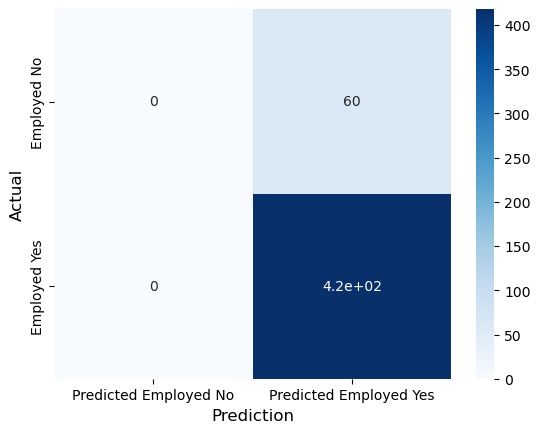

In [103]:
# Creating a Confusion Matrix for Logistic Regression

conf_matrix = confusion_matrix(y_test, y_pred.round())

sns.heatmap(conf_matrix, annot=True, cmap='Blues',
           xticklabels=['Predicted Employed No','Predicted Employed Yes'],
           yticklabels=['Employed No','Employed Yes'])
plt.ylabel('Actual',fontsize=12)
plt.xlabel('Prediction',fontsize=12)
plt.show()

In [104]:
# Calculating Accuracy, Precision and Recall

accuracy = accuracy_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.8744769874476988
Recall: 1.0
Precision: 0.8744769874476988
